In [1]:
### Librerias
import numpy as np
import scipy.stats as ss
import random 
import math
import matplotlib.pyplot as plt 

In [19]:
np.random.seed(1234)
#Poblacion_1=ss.poisson.rvs()
Poblacion_1=ss.poisson.rvs(loc=5,mu=35,size=15000000)
Poblacion_2=ss.poisson.rvs(loc=18,mu=10,size=10000000)

In [20]:
Poblacion=np.concatenate((Poblacion_1,Poblacion_2))

In [21]:
len(Poblacion)

25000000

In [22]:
Poblacion.mean()

35.20056272

In [23]:
Poblacion_1.mean()

40.00116353333333

In [24]:
Poblacion_2.mean()

27.9996615

In [29]:
## seleccionamos una muestra
muestra_edades=np.random.choice(a=Poblacion,size=20)

In [30]:
muestra_edades.mean()

33.15

In [31]:
### Frecuencia Absoluta
Poblacion.mean()-muestra_edades.mean()

2.050562720000002

In [32]:
### Frecuencia relativa
abs((Poblacion.mean()-muestra_edades.mean())/Poblacion.mean())*100

5.82536914625779

In [12]:
### Proporción 
poblacion_color_ojos=(["marron"]*137215 + ["azul"]*50025+["verde"]*80132+["negro"]*20200)

In [13]:
len(poblacion_color_ojos)

287572

In [33]:
## Muestra
muestra_color_ojos=random.sample(poblacion_color_ojos,2300)

In [34]:
for color in set(poblacion_color_ojos):
    print("proporcion estimada del {color} será: {resultado}".format(color=color,resultado=muestra_color_ojos.count(color)/len(muestra_color_ojos)))

proporcion estimada del verde será: 0.2791304347826087
proporcion estimada del azul será: 0.17478260869565218
proporcion estimada del marron será: 0.4826086956521739
proporcion estimada del negro será: 0.06347826086956522


In [35]:
import pandas as pd

In [ ]:
pd.DataFrame(poblacion_color_ojos)#.values_count()

In [36]:
a=pd.DataFrame(poblacion_color_ojos)

In [37]:
a[0].value_counts(normalize=True)

marron    0.477150
verde     0.278650
azul      0.173956
negro     0.070243
Name: 0, dtype: float64

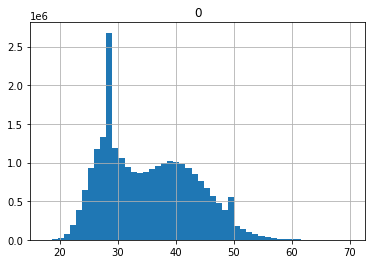

In [38]:
pd.DataFrame(Poblacion).hist(bins=50,range=(17.5,70));

In [39]:
ss.kurtosis(Poblacion)

-0.6947503357645544

In [40]:
ss.skew(Poblacion)

0.343981711746185

In [49]:
np.random.seed(125)
estimacion_puntual=[]
for x in range(20000):
    muestra=np.random.choice(a=Poblacion,size=1000)
    estimacion_puntual.append(muestra.mean())

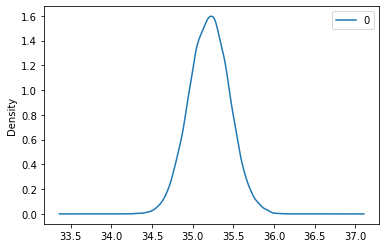

In [52]:
pd.DataFrame(estimacion_puntual).plot(kind="density");

In [50]:
np.array(estimacion_puntual).mean()

35.203100649999996

In [62]:
Poblacion.mean()

35.20056272

In [ ]:
### Intervalos de Confianza

In [53]:
n=100
muestra=np.random.choice(a=Poblacion,size=n)
media_muestral=muestra.mean()

In [63]:
media_muestral

35.53

In [ ]:
## Conociendo la varianza

In [55]:
alpha=0.05

In [56]:
z_alpha_2=alpha/2

$$\bar{x}\pm Z_{\cfrac{\alpha}{2}}\cfrac{\sigma}{\sqrt{n}}$$

In [57]:
z_critico=ss.norm.ppf(z_alpha_2)

In [58]:
z_critico

-1.9599639845400545

In [59]:
desviacion=Poblacion.std()

In [60]:
Error=z_critico*(desviacion/n)

In [61]:
print("Mi intervalo de confianza para la media es de [{0},{1}]".
      format(media_muestral+Error,media_muestral-Error))

Mi intervalo de confianza para la media es de [35.37872262234928,35.68127737765072]


In [64]:
Intervalo=[]
muestra_medias=[]
desviacion=Poblacion.std()
error=z_critico*(desviacion/n)
z_critico=ss.norm.ppf(0.975)
for i in range(30):
    muestra=np.random.choice(a=Poblacion,size=n)
    muestra_medias.append(muestra.mean())
    Intervalo_confianza=(muestra.mean()-error,muestra.mean()+error)
    Intervalo.append(Intervalo_confianza)


In [66]:
Intervalo

[(34.26872262234928, 34.57127737765072),
 (33.898722622349275, 34.20127737765072),
 (34.758722622349275, 35.06127737765072),
 (35.27872262234928, 35.58127737765072),
 (35.30872262234928, 35.61127737765072),
 (34.66872262234928, 34.97127737765072),
 (35.15872262234928, 35.461277377650724),
 (35.49872262234928, 35.80127737765072),
 (35.77872262234928, 36.08127737765072),
 (35.648722622349275, 35.95127737765072),
 (34.48872262234928, 34.79127737765072),
 (34.97872262234928, 35.281277377650724),
 (35.41872262234928, 35.72127737765072),
 (36.01872262234928, 36.32127737765072),
 (35.468722622349276, 35.77127737765072),
 (34.538722622349276, 34.84127737765072),
 (34.41872262234928, 34.72127737765072),
 (35.84872262234928, 36.15127737765072),
 (36.04872262234928, 36.351277377650725),
 (35.468722622349276, 35.77127737765072),
 (34.90872262234928, 35.211277377650724),
 (35.40872262234928, 35.711277377650724),
 (35.16872262234928, 35.47127737765072),
 (35.58872262234928, 35.891277377650724),
 (35

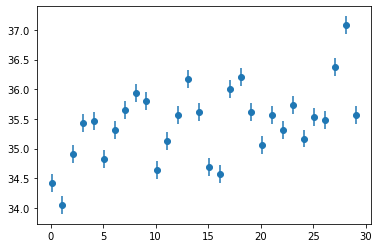

In [65]:
plt.errorbar(x=np.arange(0.1,30,1),
            y=muestra_medias,
            yerr=[(max-min)/2 for max, min in Intervalo],
            fmt='o');

In [ ]:
### La varianza población es desconocida

In [72]:
n=15
muestra=np.random.choice(a=Poblacion,size=n)

In [73]:
media_muestral=muestra.mean()
t_critico=ss.t.ppf(0.975,df=n-1)
cuasi_desviacion_muestral=muestra.std(ddof=1)


In [74]:
intervalo_confianza=(media_muestral-t_critico*cuasi_desviacion_muestral/math.sqrt(n),media_muestral+t_critico*cuasi_desviacion_muestral/math.sqrt(n))

In [75]:
intervalo_confianza

(28.07632478515162, 37.79034188151504)

In [71]:
cuasi_desviacion_muestral

8.241896247523425